In [12]:
#import libraries
import requests, zipfile
import pandas as pd
import io
import os
import numpy as np 
import tensorflow as tf
from matplotlib import pyplot as plt
from io import StringIO
import itertools as it
from datetime import datetime
import sklearn as sklearn
np.set_printoptions(threshold=sys.maxsize)
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

In [13]:
#declare global variables 
daily_monthly = 'daily'
time_lapse = '4h'
bitcoin_par = 'BTCBUSD'
year_2022 = '2022-'
year_2023 = '2023-'
url = 'https://data.binance.vision/data/spot/'+daily_monthly+'/klines/'+bitcoin_par+'/'+time_lapse+'/'+bitcoin_par+'-'+time_lapse+'-'
zip = '.zip'
#https://data.binance.vision/data/spot/daily/klines/BTCBUSD/4h/BTCBUSD-4h-
print(url)

https://data.binance.vision/data/spot/daily/klines/BTCBUSD/4h/BTCBUSD-4h-


In [7]:
'''
x = np.array([], dtype=np.uint32)
y = np.array([], dtype=np.uint32)
#download the data and unzip
try:
    for year_loop in range(2021, 2024):
        for month_loop in range(1, 13):
            if month_loop in (1,3,5,7,8,10,12):
                days_range = 32
            elif month_loop in (4,6,9,11):
                days_range = 31
            else:
                days_range = 29
            month_inloop =  '0'+str(month_loop) if month_loop < 10 else str(month_loop)
            for day_loop in range(1, days_range):#days_range
                day_inloop = '0'+str(day_loop) if day_loop < 10 else str(day_loop)
                url_loop = url+str(year_loop)+'-'+str(month_inloop)+'-'+str(day_inloop)+zip
                #print(url_loop)
                #requeset info from binance
                #req_loop = requests.get(url_loop, stream=True)
                #print(req_loop.status_code)
                if  ((year_loop  >= 2021 and month_loop >= 3)):#and (year_loop <= 2023 and month_loop <= 1 and day_loop <= 5)
                    #z = zipfile.ZipFile(io.BytesIO(req_loop.content))
                    #z.extractall(os.path.join(os.getcwd(), 'data-btc'))
                    csv_name_loop = bitcoin_par+'-'+time_lapse+'-'+str(year_loop)+'-'+str(month_inloop)+'-'+str(day_inloop)+'.csv'
                    print(csv_name_loop)
                    df  =    pd.read_csv(os.path.join(os.getcwd(), 'data-btc', csv_name_loop)
                    , header = None
                    , names = ['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time', 'Quote asset volume', 'Number of trades', 'Taker buy base asset volume', 'Taker buy quote asset volume', 'ignore'])
                    x_time = df[['Open time']].to_numpy(dtype = np.float32)
                    x = np.append(x, x_time)
                    y_price_high = df[['High']].to_numpy(dtype = np.float32)
                    y_price_close = df[['Low']].to_numpy(dtype = np.float32)
                    y_promedio = np.add(y_price_high, y_price_close)
                    y_promedio =  y_promedio/2
                    y = np.append(y, y_promedio)
except:
    print("Error")
#print(df.shape)
#df.head
'''


'\nx = np.array([], dtype=np.uint32)\ny = np.array([], dtype=np.uint32)\n#download the data and unzip\ntry:\n    for year_loop in range(2021, 2024):\n        for month_loop in range(1, 13):\n            if month_loop in (1,3,5,7,8,10,12):\n                days_range = 32\n            elif month_loop in (4,6,9,11):\n                days_range = 31\n            else:\n                days_range = 29\n            month_inloop =  \'0\'+str(month_loop) if month_loop < 10 else str(month_loop)\n            for day_loop in range(1, days_range):#days_range\n                day_inloop = \'0\'+str(day_loop) if day_loop < 10 else str(day_loop)\n                url_loop = url+str(year_loop)+\'-\'+str(month_inloop)+\'-\'+str(day_inloop)+zip\n                #print(url_loop)\n                #requeset info from binance\n                #req_loop = requests.get(url_loop, stream=True)\n                #print(req_loop.status_code)\n                if  ((year_loop  >= 2021 and month_loop >= 3)):#and (yea

In [55]:
x = np.array([], dtype=np.uint32)
y = np.array([], dtype=np.uint32)
#download and charge 2021 from month 3 to month 12
for month_loop in range (3, 12):
    if month_loop in (1,3,5,7,8,10,12):
        days_range = 32
    elif month_loop in (4,6,9,11):
        days_range = 31
    else:
        days_range = 29
    month_inloop =  '0'+str(month_loop) if month_loop < 10 else str(month_loop)
    for day_loop in range(1, days_range):#days_range
        day_inloop = '0'+str(day_loop) if day_loop < 10 else str(day_loop)
        url_loop = url+str(2021)+'-'+str(month_inloop)+'-'+str(day_inloop)+zip
        #print(url_loop)
        #requeset info from binance
        #req_loop = requests.get(url_loop, stream=True)
        #print(req_loop.status_code)
        z = zipfile.ZipFile(io.BytesIO(req_loop.content))
        z.extractall(os.path.join(os.getcwd(), 'data-btc'))
        csv_name_loop = bitcoin_par+'-'+time_lapse+'-'+str(2021)+'-'+str(month_inloop)+'-'+str(day_inloop)+'.csv'
        #print(csv_name_loop)
        df  =    pd.read_csv(os.path.join(os.getcwd(), 'data-btc', csv_name_loop)
        , header = None
        , names = ['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time', 'Quote asset volume', 'Number of trades', 'Taker buy base asset volume', 'Taker buy quote asset volume', 'ignore'])
        x_time = df[['Open time']].to_numpy(dtype = np.float32)
        x = np.append(x, x_time)
        y_price_high = df[['High']].to_numpy(dtype = np.float32)
        y_price_close = df[['Low']].to_numpy(dtype = np.float32)
        y_promedio = np.add(y_price_high, y_price_close)
        y_promedio =  y_promedio/2
        y = np.append(y, y_promedio)
        
#download and charge 2022 all the motnhs
for month_loop in range (1, 12):
    if month_loop in (1,3,5,7,8,10,12):
        days_range = 32
    elif month_loop in (4,6,9,11):
        days_range = 31
    else:
        days_range = 29
    month_inloop =  '0'+str(month_loop) if month_loop < 10 else str(month_loop)
    for day_loop in range(1, days_range):#days_range
        day_inloop = '0'+str(day_loop) if day_loop < 10 else str(day_loop)
        url_loop = url+str(2022)+'-'+str(month_inloop)+'-'+str(day_inloop)+zip
        #print(url_loop)
        #requeset info from binance
        #req_loop = requests.get(url_loop, stream=True)
        #print(req_loop.status_code)
        z = zipfile.ZipFile(io.BytesIO(req_loop.content))
        z.extractall(os.path.join(os.getcwd(), 'data-btc'))
        csv_name_loop = bitcoin_par+'-'+time_lapse+'-'+str(2022)+'-'+str(month_inloop)+'-'+str(day_inloop)+'.csv'
        #print(csv_name_loop)
        df  =    pd.read_csv(os.path.join(os.getcwd(), 'data-btc', csv_name_loop)
        , header = None
        , names = ['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time', 'Quote asset volume', 'Number of trades', 'Taker buy base asset volume', 'Taker buy quote asset volume', 'ignore'])
        x_time = df[['Open time']].to_numpy(dtype = np.float32)
        x = np.append(x, x_time)
        y_price_high = df[['High']].to_numpy(dtype = np.float32)
        y_price_close = df[['Low']].to_numpy(dtype = np.float32)
        y_promedio = np.add(y_price_high, y_price_close)
        y_promedio =  y_promedio/2
        y = np.append(y, y_promedio)
#download and charge 2023 in order of the days 
for month_loop in range (1, 2):
    if month_loop in (1,3,5,7,8,10,12):
        days_range = 32
    elif month_loop in (4,6,9,11):
        days_range = 31
    else:
        days_range = 29
    month_inloop =  '0'+str(month_loop) if month_loop < 10 else str(month_loop)
    for day_loop in range(1, 5):#days_range
        day_inloop = '0'+str(day_loop) if day_loop < 10 else str(day_loop)
        url_loop = url+str(2023)+'-'+str(month_inloop)+'-'+str(day_inloop)+zip
        #print(url_loop)
        #requeset info from binance
        #req_loop = requests.get(url_loop, stream=True)
        #print(req_loop.status_code)
        z = zipfile.ZipFile(io.BytesIO(req_loop.content))
        z.extractall(os.path.join(os.getcwd(), 'data-btc'))
        csv_name_loop = bitcoin_par+'-'+time_lapse+'-'+str(2023)+'-'+str(month_inloop)+'-'+str(day_inloop)+'.csv'
        #print(csv_name_loop)
        df  =    pd.read_csv(os.path.join(os.getcwd(), 'data-btc', csv_name_loop)
        , header = None
        , names = ['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time', 'Quote asset volume', 'Number of trades', 'Taker buy base asset volume', 'Taker buy quote asset volume', 'ignore'])
        x_time = df[['Open time']].to_numpy(dtype = np.float32)
        x = np.append(x, x_time)
        y_price_high = df[['High']].to_numpy(dtype = np.float32)
        y_price_close = df[['Low']].to_numpy(dtype = np.float32)
        y_promedio = np.add(y_price_high, y_price_close)
        y_promedio =  y_promedio/2
        y = np.append(y, y_promedio)


In [56]:
df_scal = pd.DataFrame(y)
scaler = MinMaxScaler(feature_range=(0,1))
y_close=scaler.fit_transform(np.array(df_scal).reshape(-1,1))

(3678,)


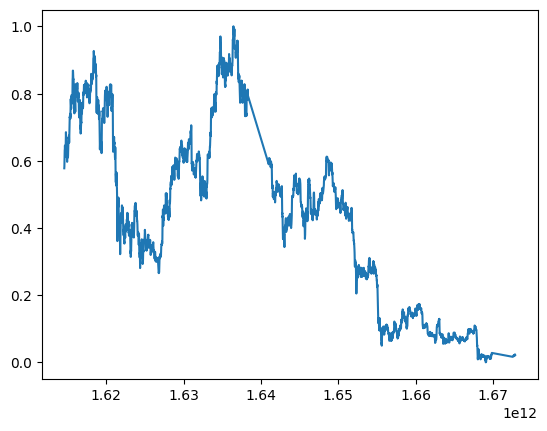

In [57]:
print(y.shape)
#plt.plot(x, y)
plt.plot(x, y_close)
plt.show()

(3678,)


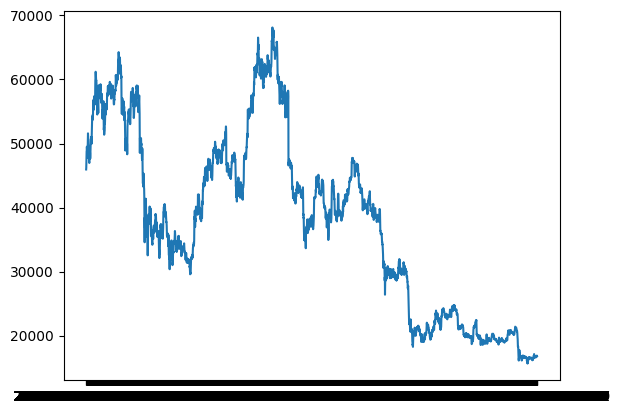

In [58]:
def cast_time_data(np_array):
    x_new_time = []
    for time_unix in np_array:
        new_time = int(str(time_unix)[0:10])
        unixToDatetime = datetime.fromtimestamp(new_time).strftime('%Y-%m-%d %H:%M:%S')
        x_new_time.append(unixToDatetime)
    return np.array(x_new_time)
x_new_time = cast_time_data(x)
print(x_new_time.shape)
plt.plot(x_new_time, y)
plt.show()

In [59]:
def prepare_y_series(np_array, series_size = 10):
    x_series = []
    y_series = []
    for y_val in range(len(np_array)-series_size):
        x_series.append([[a] for a in np_array[y_val:y_val+series_size]])
        y_series.append(np_array[y_val+series_size])
        #print(np_array[y_val+series_size])
    #print(np.array(y_series))
    return np.array(x_series), np.array(y_series)
x_series_def, y_series_def = prepare_y_series(y_close)
#prepare_data_in_percentage
nint_perc = int(len(x_series_def)*.90)
nintfive_perc = int(len(x_series_def)*.95)
hun_perc = int(len(x_series_def)*1.0)
x_train, y_train = x_series_def[:nint_perc], y_series_def[:nint_perc]
x_valid, y_valid = x_series_def[nint_perc:hun_perc], y_series_def[nint_perc:hun_perc]
x_test, y_test = x_series_def[nintfive_perc:hun_perc], y_series_def[nintfive_perc:hun_perc]
x_plt_train = x[:nint_perc]
x_plt_valid = x[nint_perc:nintfive_perc]
x_plt_test = x[nintfive_perc:hun_perc]

In [60]:
#new maderfucking model
mamfmodel = tf.keras.models.Sequential()
mamfmodel.add(tf.keras.layers.InputLayer((10, 1)))
mamfmodel.add(tf.keras.layers.LSTM(units = 64))
mamfmodel.add(tf.keras.layers.Dense(8, 'relu'))
mamfmodel.add(tf.keras.layers.Dense(1, 'linear'))
mamfmodel.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 64)                16896     
                                                                 
 dense_8 (Dense)             (None, 8)                 520       
                                                                 
 dense_9 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17,425
Trainable params: 17,425
Non-trainable params: 0
_________________________________________________________________


In [61]:
cp = tf.keras.callbacks.ModelCheckpoint('mamfmodel/', save_best_only=True)
mamfmodel.compile(loss='mean_squared_error', optimizer='adam',metrics= tf.keras.metrics.RootMeanSquaredError())
mamfmodel.fit(x_train, y_train, validation_data=(x_valid, y_valid), epochs=150, callbacks=[cp])

Epoch 1/150
 91/104 [=========================>....] - ETA: 0s - loss: 0.0909 - root_mean_squared_error: 0.3015

INFO:tensorflow:Assets written to: mamfmodel\assets


INFO:tensorflow:Assets written to: mamfmodel\assets


104/104 [==============================] - 5s 36ms/step - loss: 0.0803 - root_mean_squared_error: 0.2834 - val_loss: 3.6331e-04 - val_root_mean_squared_error: 0.0191
Epoch 2/150
 91/104 [=========================>....] - ETA: 0s - loss: 6.3904e-04 - root_mean_squared_error: 0.0253

INFO:tensorflow:Assets written to: mamfmodel\assets


INFO:tensorflow:Assets written to: mamfmodel\assets


104/104 [==============================] - 3s 29ms/step - loss: 6.1959e-04 - root_mean_squared_error: 0.0249 - val_loss: 2.8845e-04 - val_root_mean_squared_error: 0.0170
Epoch 3/150
 93/104 [=========================>....] - ETA: 0s - loss: 5.7107e-04 - root_mean_squared_error: 0.0239

INFO:tensorflow:Assets written to: mamfmodel\assets


INFO:tensorflow:Assets written to: mamfmodel\assets


104/104 [==============================] - 3s 30ms/step - loss: 5.5756e-04 - root_mean_squared_error: 0.0236 - val_loss: 2.2773e-04 - val_root_mean_squared_error: 0.0151
Epoch 4/150
100/104 [===========================>..] - ETA: 0s - loss: 5.0881e-04 - root_mean_squared_error: 0.0226

INFO:tensorflow:Assets written to: mamfmodel\assets


INFO:tensorflow:Assets written to: mamfmodel\assets


104/104 [==============================] - 3s 34ms/step - loss: 5.0925e-04 - root_mean_squared_error: 0.0226 - val_loss: 8.0930e-05 - val_root_mean_squared_error: 0.0090
Epoch 5/150
 97/104 [==========================>...] - ETA: 0s - loss: 4.8689e-04 - root_mean_squared_error: 0.0221

INFO:tensorflow:Assets written to: mamfmodel\assets


INFO:tensorflow:Assets written to: mamfmodel\assets


104/104 [==============================] - 3s 29ms/step - loss: 4.8946e-04 - root_mean_squared_error: 0.0221 - val_loss: 6.0135e-05 - val_root_mean_squared_error: 0.0078
Epoch 6/150
104/104 [==============================] - 0s 4ms/step - loss: 4.9216e-04 - root_mean_squared_error: 0.0222 - val_loss: 6.8740e-05 - val_root_mean_squared_error: 0.0083
Epoch 7/150
104/104 [==============================] - 0s 4ms/step - loss: 4.5031e-04 - root_mean_squared_error: 0.0212 - val_loss: 7.4195e-05 - val_root_mean_squared_error: 0.0086
Epoch 8/150
 93/104 [=========================>....] - ETA: 0s - loss: 4.0841e-04 - root_mean_squared_error: 0.0202

INFO:tensorflow:Assets written to: mamfmodel\assets


INFO:tensorflow:Assets written to: mamfmodel\assets


104/104 [==============================] - 3s 29ms/step - loss: 4.3226e-04 - root_mean_squared_error: 0.0208 - val_loss: 5.9585e-05 - val_root_mean_squared_error: 0.0077
Epoch 9/150
 91/104 [=========================>....] - ETA: 0s - loss: 4.6847e-04 - root_mean_squared_error: 0.0216

INFO:tensorflow:Assets written to: mamfmodel\assets


INFO:tensorflow:Assets written to: mamfmodel\assets


104/104 [==============================] - 4s 34ms/step - loss: 4.5988e-04 - root_mean_squared_error: 0.0214 - val_loss: 5.8025e-05 - val_root_mean_squared_error: 0.0076
Epoch 10/150
104/104 [==============================] - 0s 4ms/step - loss: 3.9158e-04 - root_mean_squared_error: 0.0198 - val_loss: 6.5785e-05 - val_root_mean_squared_error: 0.0081
Epoch 11/150
104/104 [==============================] - 0s 4ms/step - loss: 3.8905e-04 - root_mean_squared_error: 0.0197 - val_loss: 1.4078e-04 - val_root_mean_squared_error: 0.0119
Epoch 12/150
104/104 [==============================] - 0s 4ms/step - loss: 3.4603e-04 - root_mean_squared_error: 0.0186 - val_loss: 8.8735e-05 - val_root_mean_squared_error: 0.0094
Epoch 13/150
104/104 [==============================] - 0s 4ms/step - loss: 3.4855e-04 - root_mean_squared_error: 0.0187 - val_loss: 6.4824e-05 - val_root_mean_squared_error: 0.0081
Epoch 14/150
 98/104 [===========================>..] - ETA: 0s - loss: 3.3043e-04 - root_mean_squared

INFO:tensorflow:Assets written to: mamfmodel\assets


INFO:tensorflow:Assets written to: mamfmodel\assets


104/104 [==============================] - 3s 29ms/step - loss: 3.3589e-04 - root_mean_squared_error: 0.0183 - val_loss: 4.6559e-05 - val_root_mean_squared_error: 0.0068
Epoch 15/150
 90/104 [========================>.....] - ETA: 0s - loss: 3.3752e-04 - root_mean_squared_error: 0.0184

INFO:tensorflow:Assets written to: mamfmodel\assets


INFO:tensorflow:Assets written to: mamfmodel\assets


104/104 [==============================] - 3s 29ms/step - loss: 3.3609e-04 - root_mean_squared_error: 0.0183 - val_loss: 3.6138e-05 - val_root_mean_squared_error: 0.0060
Epoch 16/150
104/104 [==============================] - 0s 4ms/step - loss: 3.0158e-04 - root_mean_squared_error: 0.0174 - val_loss: 5.1011e-05 - val_root_mean_squared_error: 0.0071
Epoch 17/150
104/104 [==============================] - 0s 4ms/step - loss: 3.1258e-04 - root_mean_squared_error: 0.0177 - val_loss: 5.1927e-05 - val_root_mean_squared_error: 0.0072
Epoch 18/150
104/104 [==============================] - 0s 4ms/step - loss: 3.2028e-04 - root_mean_squared_error: 0.0179 - val_loss: 3.9120e-05 - val_root_mean_squared_error: 0.0063
Epoch 19/150
104/104 [==============================] - 0s 4ms/step - loss: 2.8892e-04 - root_mean_squared_error: 0.0170 - val_loss: 3.9450e-05 - val_root_mean_squared_error: 0.0063
Epoch 20/150
102/104 [============================>.] - ETA: 0s - loss: 2.9023e-04 - root_mean_squared

INFO:tensorflow:Assets written to: mamfmodel\assets


INFO:tensorflow:Assets written to: mamfmodel\assets


104/104 [==============================] - 3s 33ms/step - loss: 2.9087e-04 - root_mean_squared_error: 0.0171 - val_loss: 3.1066e-05 - val_root_mean_squared_error: 0.0056
Epoch 21/150
104/104 [==============================] - 0s 4ms/step - loss: 2.6565e-04 - root_mean_squared_error: 0.0163 - val_loss: 3.3679e-05 - val_root_mean_squared_error: 0.0058
Epoch 22/150
104/104 [==============================] - 0s 4ms/step - loss: 2.4996e-04 - root_mean_squared_error: 0.0158 - val_loss: 5.5670e-05 - val_root_mean_squared_error: 0.0075
Epoch 23/150
104/104 [==============================] - 0s 4ms/step - loss: 2.6427e-04 - root_mean_squared_error: 0.0163 - val_loss: 3.4258e-05 - val_root_mean_squared_error: 0.0059
Epoch 24/150
104/104 [==============================] - 0s 4ms/step - loss: 2.5033e-04 - root_mean_squared_error: 0.0158 - val_loss: 3.2945e-05 - val_root_mean_squared_error: 0.0057
Epoch 25/150
104/104 [==============================] - 0s 4ms/step - loss: 2.6131e-04 - root_mean_squ

INFO:tensorflow:Assets written to: mamfmodel\assets


INFO:tensorflow:Assets written to: mamfmodel\assets


104/104 [==============================] - 3s 28ms/step - loss: 2.4505e-04 - root_mean_squared_error: 0.0157 - val_loss: 2.2679e-05 - val_root_mean_squared_error: 0.0048
Epoch 27/150
104/104 [==============================] - 0s 4ms/step - loss: 2.2674e-04 - root_mean_squared_error: 0.0151 - val_loss: 3.6116e-05 - val_root_mean_squared_error: 0.0060
Epoch 28/150
104/104 [==============================] - 0s 4ms/step - loss: 2.4340e-04 - root_mean_squared_error: 0.0156 - val_loss: 2.4594e-05 - val_root_mean_squared_error: 0.0050
Epoch 29/150
104/104 [==============================] - 0s 4ms/step - loss: 2.3946e-04 - root_mean_squared_error: 0.0155 - val_loss: 2.2986e-05 - val_root_mean_squared_error: 0.0048
Epoch 30/150
 90/104 [========================>.....] - ETA: 0s - loss: 2.3619e-04 - root_mean_squared_error: 0.0154

INFO:tensorflow:Assets written to: mamfmodel\assets


INFO:tensorflow:Assets written to: mamfmodel\assets


104/104 [==============================] - 3s 29ms/step - loss: 2.2980e-04 - root_mean_squared_error: 0.0152 - val_loss: 2.1507e-05 - val_root_mean_squared_error: 0.0046
Epoch 31/150
 98/104 [===========================>..] - ETA: 0s - loss: 2.1747e-04 - root_mean_squared_error: 0.0147

INFO:tensorflow:Assets written to: mamfmodel\assets


INFO:tensorflow:Assets written to: mamfmodel\assets


104/104 [==============================] - 4s 34ms/step - loss: 2.1696e-04 - root_mean_squared_error: 0.0147 - val_loss: 1.8248e-05 - val_root_mean_squared_error: 0.0043
Epoch 32/150
104/104 [==============================] - 0s 4ms/step - loss: 2.2203e-04 - root_mean_squared_error: 0.0149 - val_loss: 4.4418e-05 - val_root_mean_squared_error: 0.0067
Epoch 33/150
104/104 [==============================] - 0s 4ms/step - loss: 1.9230e-04 - root_mean_squared_error: 0.0139 - val_loss: 1.8999e-05 - val_root_mean_squared_error: 0.0044
Epoch 34/150
104/104 [==============================] - 0s 4ms/step - loss: 2.2638e-04 - root_mean_squared_error: 0.0150 - val_loss: 1.8930e-05 - val_root_mean_squared_error: 0.0044
Epoch 35/150
104/104 [==============================] - 0s 4ms/step - loss: 1.8752e-04 - root_mean_squared_error: 0.0137 - val_loss: 2.4039e-05 - val_root_mean_squared_error: 0.0049
Epoch 36/150
 98/104 [===========================>..] - ETA: 0s - loss: 1.8972e-04 - root_mean_squared

INFO:tensorflow:Assets written to: mamfmodel\assets


INFO:tensorflow:Assets written to: mamfmodel\assets


104/104 [==============================] - 3s 30ms/step - loss: 1.8714e-04 - root_mean_squared_error: 0.0137 - val_loss: 1.6222e-05 - val_root_mean_squared_error: 0.0040
Epoch 37/150
104/104 [==============================] - 0s 4ms/step - loss: 1.9716e-04 - root_mean_squared_error: 0.0140 - val_loss: 1.7679e-05 - val_root_mean_squared_error: 0.0042
Epoch 38/150
104/104 [==============================] - 0s 4ms/step - loss: 2.0408e-04 - root_mean_squared_error: 0.0143 - val_loss: 3.1637e-05 - val_root_mean_squared_error: 0.0056
Epoch 39/150
104/104 [==============================] - 0s 4ms/step - loss: 1.8451e-04 - root_mean_squared_error: 0.0136 - val_loss: 1.8818e-05 - val_root_mean_squared_error: 0.0043
Epoch 40/150
104/104 [==============================] - 0s 4ms/step - loss: 1.7287e-04 - root_mean_squared_error: 0.0131 - val_loss: 2.9782e-05 - val_root_mean_squared_error: 0.0055
Epoch 41/150
104/104 [==============================] - 0s 4ms/step - loss: 1.6863e-04 - root_mean_squ

INFO:tensorflow:Assets written to: mamfmodel\assets


INFO:tensorflow:Assets written to: mamfmodel\assets


104/104 [==============================] - 3s 29ms/step - loss: 1.8252e-04 - root_mean_squared_error: 0.0135 - val_loss: 1.5539e-05 - val_root_mean_squared_error: 0.0039
Epoch 43/150
104/104 [==============================] - 0s 4ms/step - loss: 1.5903e-04 - root_mean_squared_error: 0.0126 - val_loss: 2.9192e-05 - val_root_mean_squared_error: 0.0054
Epoch 44/150
 97/104 [==========================>...] - ETA: 0s - loss: 1.6322e-04 - root_mean_squared_error: 0.0128

INFO:tensorflow:Assets written to: mamfmodel\assets


INFO:tensorflow:Assets written to: mamfmodel\assets


104/104 [==============================] - 3s 33ms/step - loss: 1.6009e-04 - root_mean_squared_error: 0.0127 - val_loss: 1.4529e-05 - val_root_mean_squared_error: 0.0038
Epoch 45/150
 93/104 [=========================>....] - ETA: 0s - loss: 1.5889e-04 - root_mean_squared_error: 0.0126

INFO:tensorflow:Assets written to: mamfmodel\assets


INFO:tensorflow:Assets written to: mamfmodel\assets


104/104 [==============================] - 3s 29ms/step - loss: 1.5442e-04 - root_mean_squared_error: 0.0124 - val_loss: 1.3520e-05 - val_root_mean_squared_error: 0.0037
Epoch 46/150
104/104 [==============================] - 0s 4ms/step - loss: 1.6237e-04 - root_mean_squared_error: 0.0127 - val_loss: 1.4621e-05 - val_root_mean_squared_error: 0.0038
Epoch 47/150
 97/104 [==========================>...] - ETA: 0s - loss: 1.4708e-04 - root_mean_squared_error: 0.0121

INFO:tensorflow:Assets written to: mamfmodel\assets


INFO:tensorflow:Assets written to: mamfmodel\assets


104/104 [==============================] - 3s 30ms/step - loss: 1.4466e-04 - root_mean_squared_error: 0.0120 - val_loss: 1.2650e-05 - val_root_mean_squared_error: 0.0036
Epoch 48/150
104/104 [==============================] - 0s 4ms/step - loss: 1.5575e-04 - root_mean_squared_error: 0.0125 - val_loss: 1.4799e-05 - val_root_mean_squared_error: 0.0038
Epoch 49/150
104/104 [==============================] - 0s 4ms/step - loss: 1.4699e-04 - root_mean_squared_error: 0.0121 - val_loss: 1.4585e-05 - val_root_mean_squared_error: 0.0038
Epoch 50/150
104/104 [==============================] - 0s 4ms/step - loss: 1.4085e-04 - root_mean_squared_error: 0.0119 - val_loss: 3.2651e-05 - val_root_mean_squared_error: 0.0057
Epoch 51/150
104/104 [==============================] - 0s 4ms/step - loss: 1.5589e-04 - root_mean_squared_error: 0.0125 - val_loss: 1.9779e-05 - val_root_mean_squared_error: 0.0044
Epoch 52/150
104/104 [==============================] - 0s 4ms/step - loss: 1.5734e-04 - root_mean_squ

INFO:tensorflow:Assets written to: mamfmodel\assets


INFO:tensorflow:Assets written to: mamfmodel\assets


104/104 [==============================] - 4s 34ms/step - loss: 1.5106e-04 - root_mean_squared_error: 0.0123 - val_loss: 1.2591e-05 - val_root_mean_squared_error: 0.0035
Epoch 55/150
104/104 [==============================] - 0s 4ms/step - loss: 1.4107e-04 - root_mean_squared_error: 0.0119 - val_loss: 3.1161e-05 - val_root_mean_squared_error: 0.0056
Epoch 56/150
104/104 [==============================] - 0s 4ms/step - loss: 1.4472e-04 - root_mean_squared_error: 0.0120 - val_loss: 1.6613e-05 - val_root_mean_squared_error: 0.0041
Epoch 57/150
104/104 [==============================] - 0s 4ms/step - loss: 1.5646e-04 - root_mean_squared_error: 0.0125 - val_loss: 1.9482e-05 - val_root_mean_squared_error: 0.0044
Epoch 58/150
104/104 [==============================] - 0s 4ms/step - loss: 1.3429e-04 - root_mean_squared_error: 0.0116 - val_loss: 2.3929e-05 - val_root_mean_squared_error: 0.0049
Epoch 59/150
 92/104 [=========================>....] - ETA: 0s - loss: 1.2999e-04 - root_mean_squared

INFO:tensorflow:Assets written to: mamfmodel\assets


INFO:tensorflow:Assets written to: mamfmodel\assets


104/104 [==============================] - 3s 30ms/step - loss: 1.2834e-04 - root_mean_squared_error: 0.0113 - val_loss: 1.0428e-05 - val_root_mean_squared_error: 0.0032
Epoch 60/150
104/104 [==============================] - 0s 4ms/step - loss: 1.2786e-04 - root_mean_squared_error: 0.0113 - val_loss: 1.9513e-05 - val_root_mean_squared_error: 0.0044
Epoch 61/150
104/104 [==============================] - 0s 4ms/step - loss: 1.2450e-04 - root_mean_squared_error: 0.0112 - val_loss: 1.2306e-05 - val_root_mean_squared_error: 0.0035
Epoch 62/150
 97/104 [==========================>...] - ETA: 0s - loss: 1.3087e-04 - root_mean_squared_error: 0.0114

INFO:tensorflow:Assets written to: mamfmodel\assets


INFO:tensorflow:Assets written to: mamfmodel\assets


104/104 [==============================] - 3s 29ms/step - loss: 1.2879e-04 - root_mean_squared_error: 0.0113 - val_loss: 1.0012e-05 - val_root_mean_squared_error: 0.0032
Epoch 63/150
104/104 [==============================] - 0s 4ms/step - loss: 1.2780e-04 - root_mean_squared_error: 0.0113 - val_loss: 1.0292e-05 - val_root_mean_squared_error: 0.0032
Epoch 64/150
104/104 [==============================] - 0s 4ms/step - loss: 1.3739e-04 - root_mean_squared_error: 0.0117 - val_loss: 1.2524e-05 - val_root_mean_squared_error: 0.0035
Epoch 65/150
104/104 [==============================] - 0s 4ms/step - loss: 1.4232e-04 - root_mean_squared_error: 0.0119 - val_loss: 1.3243e-05 - val_root_mean_squared_error: 0.0036
Epoch 66/150
104/104 [==============================] - 0s 4ms/step - loss: 1.2496e-04 - root_mean_squared_error: 0.0112 - val_loss: 1.0546e-05 - val_root_mean_squared_error: 0.0032
Epoch 67/150
104/104 [==============================] - 0s 4ms/step - loss: 1.2388e-04 - root_mean_squ

INFO:tensorflow:Assets written to: mamfmodel\assets


INFO:tensorflow:Assets written to: mamfmodel\assets


104/104 [==============================] - 4s 34ms/step - loss: 1.2785e-04 - root_mean_squared_error: 0.0113 - val_loss: 9.7470e-06 - val_root_mean_squared_error: 0.0031
Epoch 77/150
104/104 [==============================] - 0s 4ms/step - loss: 1.2500e-04 - root_mean_squared_error: 0.0112 - val_loss: 1.1477e-05 - val_root_mean_squared_error: 0.0034
Epoch 78/150
104/104 [==============================] - 0s 4ms/step - loss: 1.2620e-04 - root_mean_squared_error: 0.0112 - val_loss: 2.2249e-05 - val_root_mean_squared_error: 0.0047
Epoch 79/150
104/104 [==============================] - 0s 4ms/step - loss: 1.2900e-04 - root_mean_squared_error: 0.0114 - val_loss: 1.1139e-05 - val_root_mean_squared_error: 0.0033
Epoch 80/150
104/104 [==============================] - 0s 4ms/step - loss: 1.3801e-04 - root_mean_squared_error: 0.0117 - val_loss: 3.0546e-05 - val_root_mean_squared_error: 0.0055
Epoch 81/150
104/104 [==============================] - 0s 4ms/step - loss: 1.3083e-04 - root_mean_squ

INFO:tensorflow:Assets written to: mamfmodel\assets


INFO:tensorflow:Assets written to: mamfmodel\assets


104/104 [==============================] - 3s 28ms/step - loss: 1.2815e-04 - root_mean_squared_error: 0.0113 - val_loss: 9.3462e-06 - val_root_mean_squared_error: 0.0031
Epoch 86/150
104/104 [==============================] - 0s 4ms/step - loss: 1.2449e-04 - root_mean_squared_error: 0.0112 - val_loss: 1.2446e-05 - val_root_mean_squared_error: 0.0035
Epoch 87/150
104/104 [==============================] - 0s 4ms/step - loss: 1.2753e-04 - root_mean_squared_error: 0.0113 - val_loss: 1.7122e-05 - val_root_mean_squared_error: 0.0041
Epoch 88/150
104/104 [==============================] - 0s 4ms/step - loss: 1.3005e-04 - root_mean_squared_error: 0.0114 - val_loss: 1.0291e-05 - val_root_mean_squared_error: 0.0032
Epoch 89/150
104/104 [==============================] - 0s 4ms/step - loss: 1.3421e-04 - root_mean_squared_error: 0.0116 - val_loss: 2.5664e-05 - val_root_mean_squared_error: 0.0051
Epoch 90/150
104/104 [==============================] - 0s 4ms/step - loss: 1.3079e-04 - root_mean_squ

INFO:tensorflow:Assets written to: mamfmodel\assets


INFO:tensorflow:Assets written to: mamfmodel\assets


104/104 [==============================] - 3s 29ms/step - loss: 1.1646e-04 - root_mean_squared_error: 0.0108 - val_loss: 9.2538e-06 - val_root_mean_squared_error: 0.0030
Epoch 108/150
104/104 [==============================] - 0s 4ms/step - loss: 1.2775e-04 - root_mean_squared_error: 0.0113 - val_loss: 9.2883e-06 - val_root_mean_squared_error: 0.0030
Epoch 109/150
104/104 [==============================] - 0s 4ms/step - loss: 1.2195e-04 - root_mean_squared_error: 0.0110 - val_loss: 1.2305e-05 - val_root_mean_squared_error: 0.0035
Epoch 110/150
104/104 [==============================] - 0s 4ms/step - loss: 1.3620e-04 - root_mean_squared_error: 0.0117 - val_loss: 1.0384e-05 - val_root_mean_squared_error: 0.0032
Epoch 111/150
104/104 [==============================] - 0s 4ms/step - loss: 1.2344e-04 - root_mean_squared_error: 0.0111 - val_loss: 1.0051e-05 - val_root_mean_squared_error: 0.0032
Epoch 112/150
104/104 [==============================] - 0s 4ms/step - loss: 1.2471e-04 - root_mea

INFO:tensorflow:Assets written to: mamfmodel\assets


INFO:tensorflow:Assets written to: mamfmodel\assets


104/104 [==============================] - 3s 33ms/step - loss: 1.2000e-04 - root_mean_squared_error: 0.0110 - val_loss: 9.2296e-06 - val_root_mean_squared_error: 0.0030


6/6 [==============================] - 0s 1ms/step


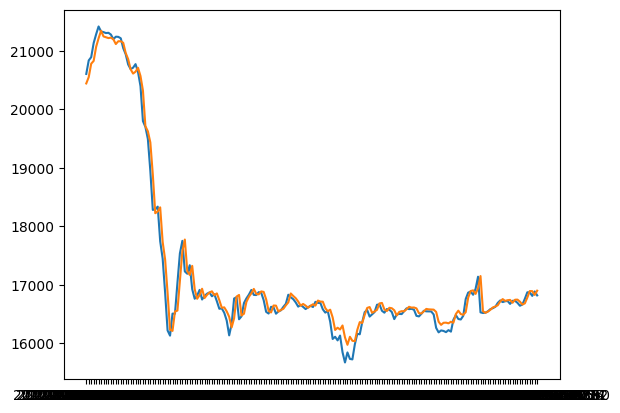

In [67]:
y_pred = mamfmodel.predict(x_test)
y_predict = scaler.inverse_transform(y_pred)
test_predict = scaler.inverse_transform(y_test)

#print(y_pred)
#print(x_plt_test)
plt.plot(cast_time_data(x_plt_test),test_predict)
plt.plot(cast_time_data(x_plt_test),y_predict)
plt.show()

115/115 [==============================] - 0s 1ms/step
(3668,) (3668, 1)


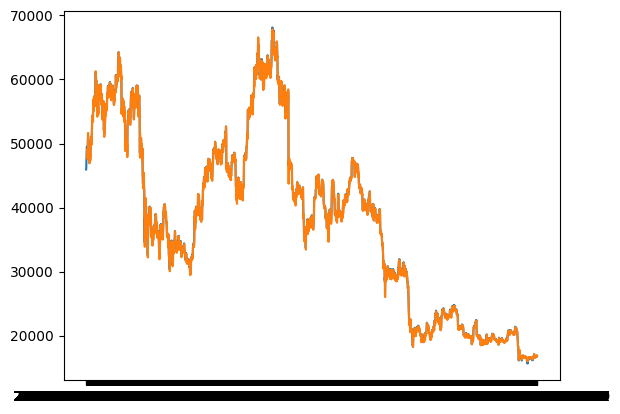

In [68]:
y_pred = mamfmodel.predict(x_series_def)
y_predict = scaler.inverse_transform(y_pred)
x_plot = x[10:]
print(x_plot.shape, y_pred.shape)
plt.plot(cast_time_data(x),y)
plt.plot(cast_time_data(x_plot),y_predict)
plt.show()

1/1 [==============================] - 0s 28ms/step
(16,)
[[0.0237123 ]
 [0.02398214]
 [0.02424046]
 [0.02449341]
 [0.02474249]
 [0.02498589]
 [0.02522133]
 [0.02544985]
 [0.02567379]
 [0.02589122]
 [0.02610244]
 [0.02630755]
 [0.02650672]
 [0.02670017]
 [0.02688804]
 [0.02707052]]


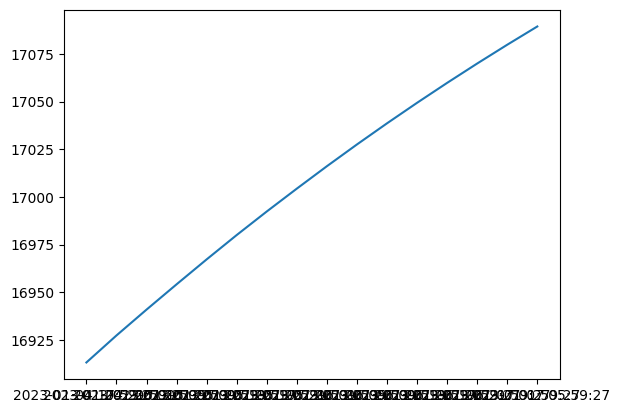

In [73]:
def bracket_list(list):
    new_list = []
    for value in range(len(list)):
        new_value = [list[value]]
        new_list.append(new_value)
    return np.array([new_list])

def predict_next_days(model_ker : tf.keras.models, data , days = 1, hours = 4):
    new_data = data
    last_days = []
    last_series = np.array([data[-1]])
    pred = mamfmodel.predict(last_series).flatten()
    new_pred_series = np.delete(last_series, 0)
    new_pred_series = np.append(new_pred_series, pred)
    new_pred_series = bracket_list(new_pred_series)
    last_series = new_pred_series
    for i in range(days*hours):
        pred = mamfmodel.predict(last_series).flatten()
        new_pred_series = np.delete(last_series, 0)
        new_pred_series = np.append(new_pred_series, pred)
        new_pred_series = bracket_list(new_pred_series)
        last_series = new_pred_series
        last_days.append(pred)
    return np.array(last_days)

def add_days(x_ser, days = 1, hours = 4):
    new_days = []
    new_day = x_ser[-1] + 4*60*60*1000
    #range_h = int(24/hours)
    for i in range(days*hours):
        new_days.append(new_day)
        new_day += 4*60*60*1000
    return np.array(new_days)


#print(y_close.shape)
x_next_days = add_days(x, days = 4)
y_next_pred = predict_next_days(mamfmodel, x_series_def , 4)
print(x_next_days.shape)
print(y_next_pred)
plt.plot(cast_time_data(x_next_days),scaler.inverse_transform(y_next_pred))